<a href="https://colab.research.google.com/github/HarshNVyas/ML-Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Cloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import File and EDA

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Experiment/creditcard.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
dataset_info = {
    "First Five Rows": data.head(),
    "Dataset Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Summary Statistics": data.describe()
}

dataset_info

{'First Five Rows':    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 

First Five Rows:

The dataset consists of features labeled V1 to V28, Time, Amount, and Class.
The 'Class' variable, which is our target, is binary (0 or 1).
Dataset Shape:

The dataset has 284,807 rows and 31 columns.
Data Types:

All features are numeric. Most are of type float64, and 'Class' is an int64.
Missing Values:

There are no missing values in the dataset.

# Visualize the columns

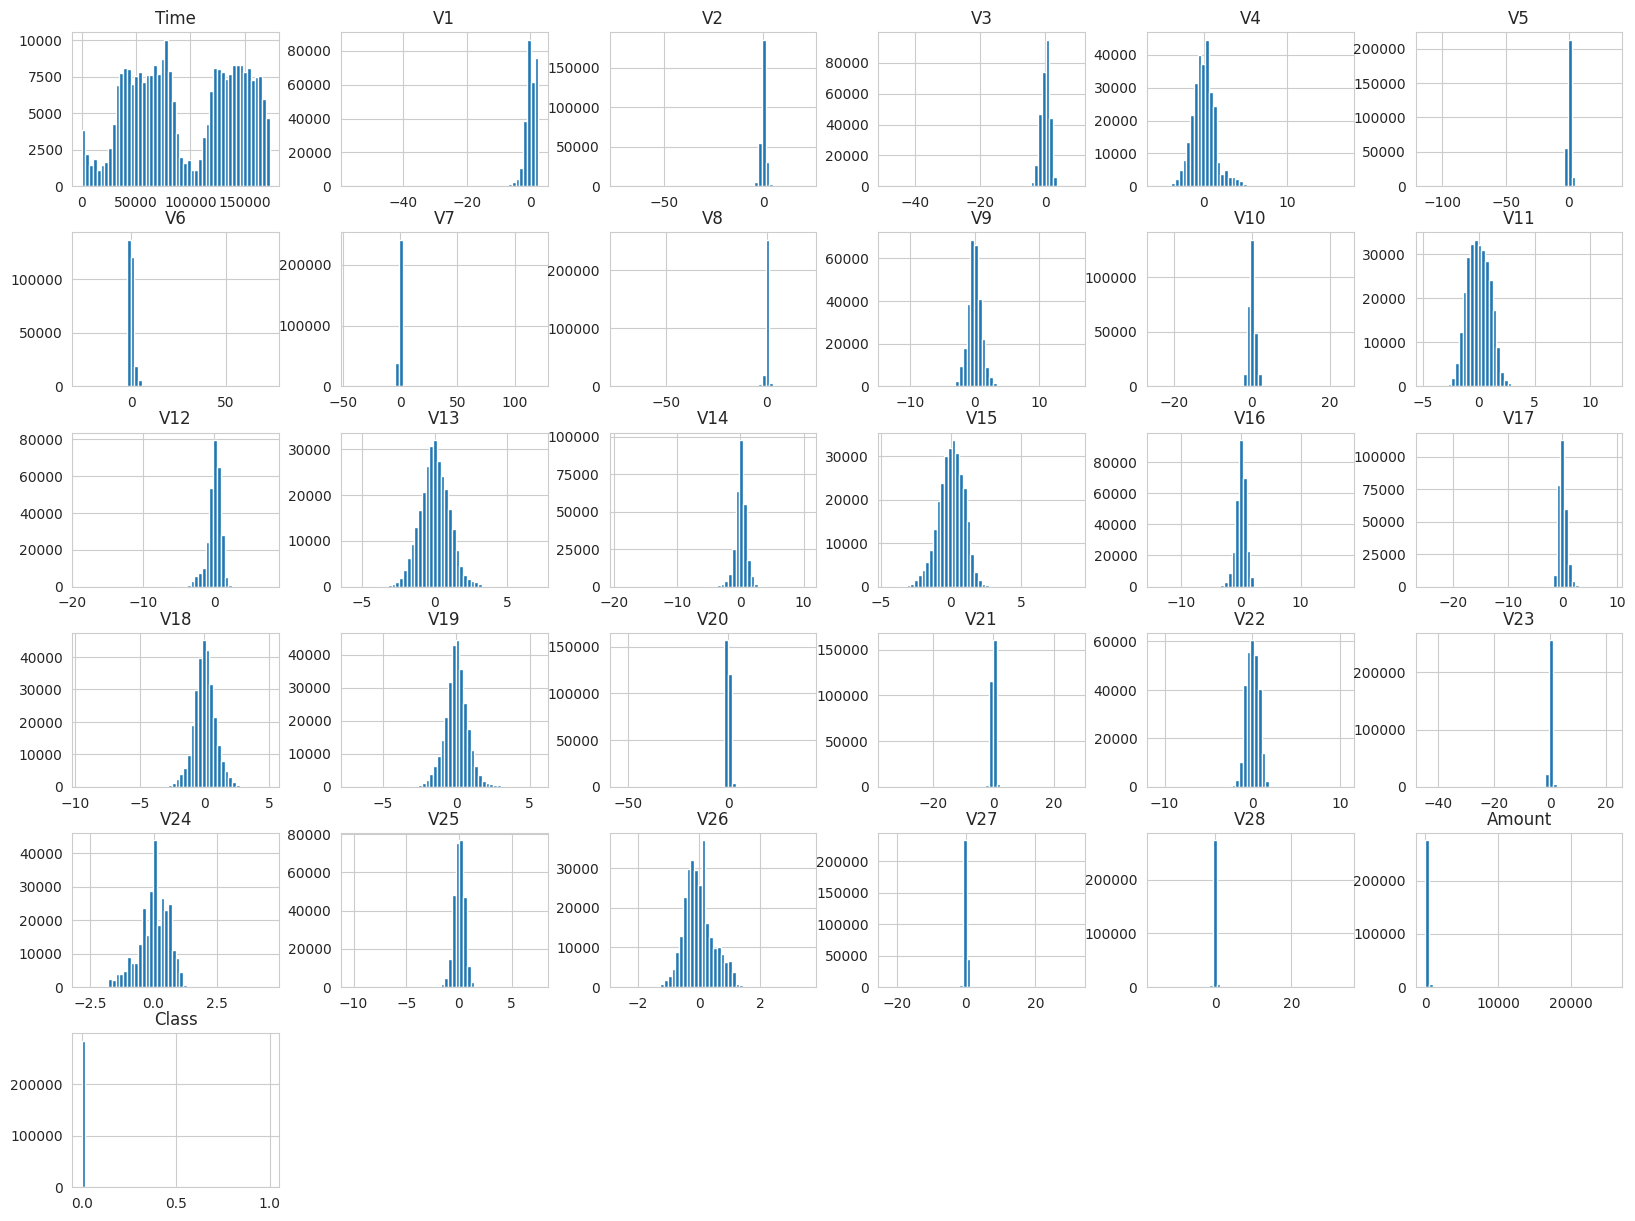

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting histograms for each column
data.hist(bins=50, figsize=(20,15))
plt.show()

# Correlation Heatmap

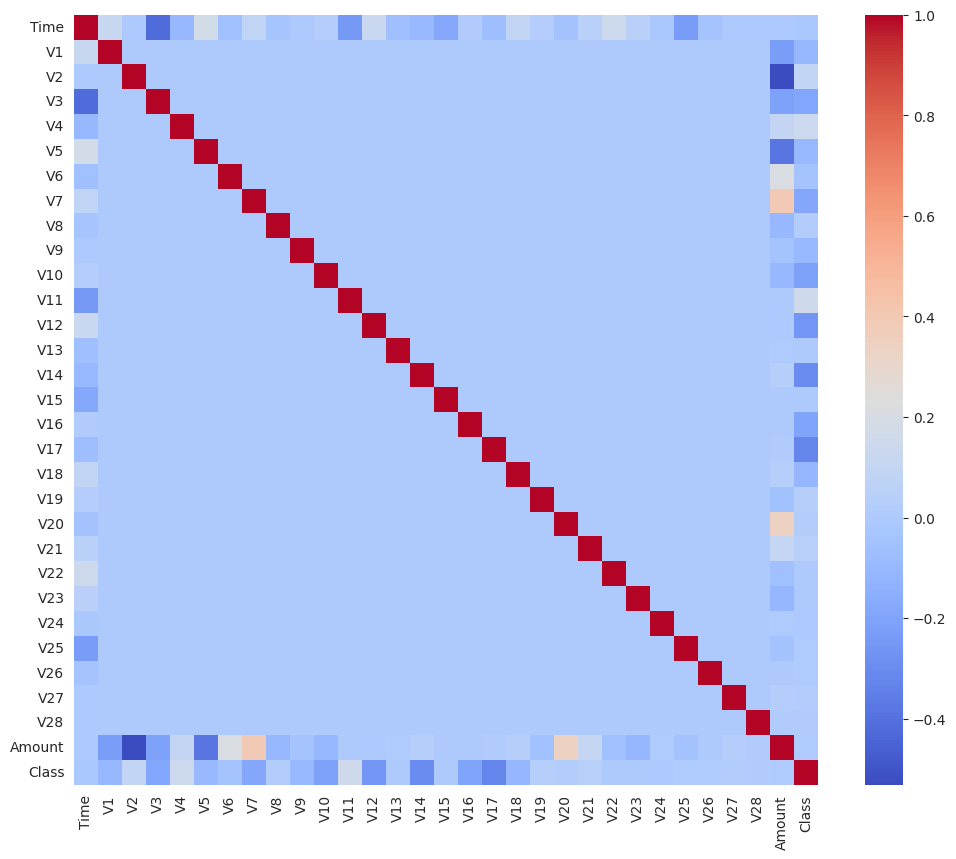

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

# Visualize Outliers

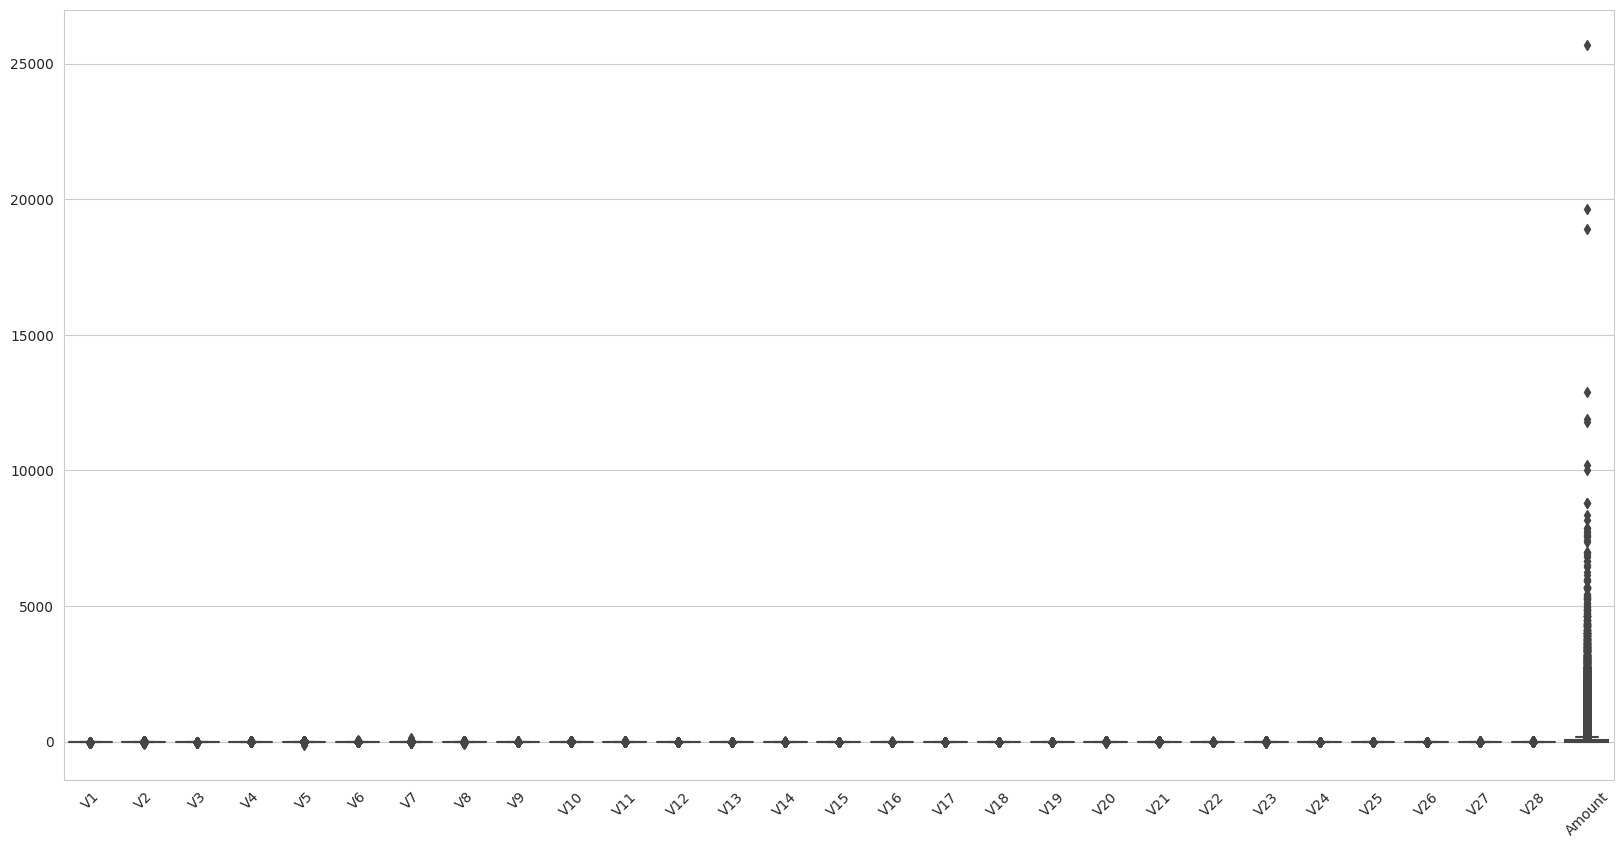

In [ ]:
# You can plot box plots for each feature to detect outliers.
# Due to a large number of features, you may choose to plot them in batches or individually.

plt.figure(figsize=(20, 10))
sns.boxplot(data=data.drop(columns=['Class', 'Time']))
plt.xticks(rotation=45)
plt.show()

# Visualize Class distributions

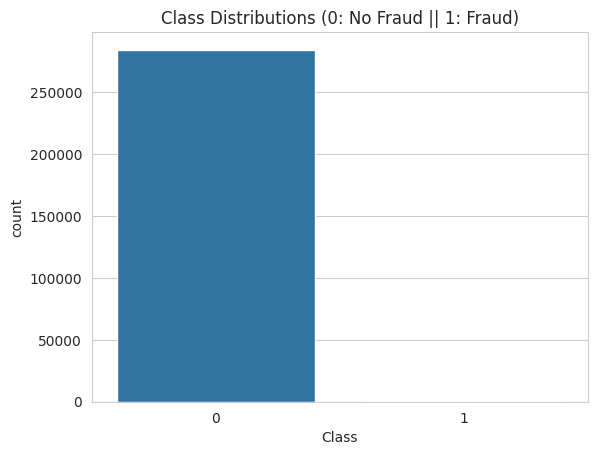

In [ ]:
sns.countplot(x='Class', data=data)
plt.title('Class Distributions (0: No Fraud || 1: Fraud)')
plt.show()

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# Create a new DataFrame for the robustly scaled features
robust_scaled_features = data.copy()

# Apply RobustScaler to Time and Amount
robust_scaler = RobustScaler()
robust_scaled_features['Robust_Scaled_Time'] = robust_scaler.fit_transform(data['Time'].values.reshape(-1, 1))
robust_scaled_features['Robust_Scaled_Amount'] = robust_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Assuming Time feature represents seconds, converting it to hours
hours_in_day = 24

# Create cyclical features for hours from Robust_Scaled_Time
robust_scaled_features['sin_time'] = np.sin(2 * np.pi * robust_scaled_features.Robust_Scaled_Time/hours_in_day)
robust_scaled_features['cos_time'] = np.cos(2 * np.pi * robust_scaled_features.Robust_Scaled_Time/hours_in_day)

# Drop the original Time and Amount features
robust_scaled_features.drop(['Time', 'Amount', 'Robust_Scaled_Time'], axis=1, inplace=True)

# Expanding the dataset

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
X = robust_scaled_features.drop('Class', axis=1)
y = robust_scaled_features['Class']

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Modelling

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate probabilities for ROC AUC
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[55393  1357]
 [ 4370 52606]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

ROC AUC Score: 0.9896968610015253


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization parameter
    'penalty': ['l1', 'l2'], # The norm used in the penalization
    'solver': ['liblinear'] # Algorithm to use in the optimization problem
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print(f"Best parameters: {best_params}")
print(f"Best cross-validated ROC AUC score: {best_score}")

# Use the best estimator to make predictions
y_pred_best = grid_search.best_estimator_.predict(X_test)
y_pred_proba_best = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Evaluation with the tuned model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

# Print the evaluation results with the tuned model
print("Confusion Matrix with the tuned model:\n", conf_matrix_best)
print("\nClassification Report with the tuned model:\n", class_report_best)
print("ROC AUC Score with the tuned model:", roc_auc_best)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   3.8s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   2.2s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   2.7s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   3.2s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   2.9s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   5.9s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   6.4s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   6.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   5.8s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   6.6s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   6.3s
[CV] END ...............C=0.01, penalty=l1, solv

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

## Evaluation using Confusion Matrix

In [ ]:
# Evaluation
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
# rf_cv_scores =rf_classifier.score(y_test, y_pred_rf)

# Print the evaluation results
# print(f"Random Forest Cross-Validated ROC AUC Scores: {rf_cv_scores}")
# print(f"Random Forest Average ROC AUC Score: {np.mean(rf_cv_scores)}")
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", class_report_rf)
print("Random Forest ROC AUC Score:", roc_auc_rf)

Random Forest Confusion Matrix:
 [[56739    11]
 [    0 56976]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Random Forest ROC AUC Score: 0.9999986606927471


### Saving the models

In [ ]:
from joblib import load, dump

filepath = '/content/drive/MyDrive/Experiment/'
# Save the model to a file
dump(rf_classifier, filepath+'random_forest_model.joblib')
dump(log_reg, filepath+'logistic_regression_model.joblib')
#dump(xgb_classifier, 'xgb_classifier_model.joblib')
print("Models saved successfully!")

Models saved successfully!


## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc')

# Evaluate the classifier using cross-validation
xgb_cv_scores = cross_val_score(xgb_classifier, X_resampled, y_resampled, cv=5, scoring='roc_auc')

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

# Evaluation
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Print the evaluation results
print(f"XGBoost Cross-Validated ROC AUC Scores: {xgb_cv_scores}")
print(f"XGBoost Average ROC AUC Score: {np.mean(xgb_cv_scores)}")
print("XGBoost Confusion Matrix:\n", conf_matrix_xgb)
print("\nXGBoost Classification Report:\n", class_report_xgb)
print("XGBoost ROC AUC Score:", roc_auc_xgb)

XGBoost Cross-Validated ROC AUC Scores: [0.99850283 0.9997605  0.99978274 0.9999257  0.99894919]
XGBoost Average ROC AUC Score: 0.9993841905652122
XGBoost Confusion Matrix:
 [[56723    27]
 [    0 56976]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

XGBoost ROC AUC Score: 0.9999964795440571


### Saving the model

In [ ]:
dump(xgb_classifier, filepath+'xgb_classifier_model.joblib')

['/content/drive/MyDrive/Experiment/xgb_classifier_model.joblib']

# Loading the models

In [ ]:
from joblib import load

In [ ]:
logistic_regression_model = load('/content/drive/MyDrive/Experiment/logistic_regression_model.joblib')
random_forest_model = load('/content/drive/MyDrive/Experiment/random_forest_model.joblib')
xgb_classifier_model = load('/content/drive/MyDrive/Experiment/xgb_classifier_model.joblib')

#Assessment

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Predict on the test set
y_pred = logistic_regression_model.predict(X_test)

# Calculate probabilities for ROC AUC
y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Confusion Matrix:
 [[55393  1357]
 [ 4370 52606]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

ROC AUC Score: 0.9896968610015253


RF

## Predicting the results

In [ ]:
# Make predictions
y_pred_rf = random_forest_model.predict(X_test)
y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Evaluation
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
# rf_cv_scores =rf_classifier.score(y_test, y_pred_rf)

# Print the evaluation results
# print(f"Random Forest Cross-Validated ROC AUC Scores: {rf_cv_scores}")
# print(f"Random Forest Average ROC AUC Score: {np.mean(rf_cv_scores)}")
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", class_report_rf)
print("Random Forest ROC AUC Score:", roc_auc_rf)

Random Forest Confusion Matrix:
 [[56739    11]
 [    0 56976]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Random Forest ROC AUC Score: 0.9999986606927471


XGB

In [ ]:
# Make predictions
y_pred_xgb = xgb_classifier_model.predict(X_test)
y_pred_proba_xgb = xgb_classifier_model.predict_proba(X_test)[:, 1]

# Evaluation
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Print the evaluation results
print("XGBoost Confusion Matrix:\n", conf_matrix_xgb)
print("\nXGBoost Classification Report:\n", class_report_xgb)
print("XGBoost ROC AUC Score:", roc_auc_xgb)

XGBoost Confusion Matrix:
 [[56723    27]
 [    0 56976]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

XGBoost ROC AUC Score: 0.9999964795440571


## Visualizing Confusion matrix

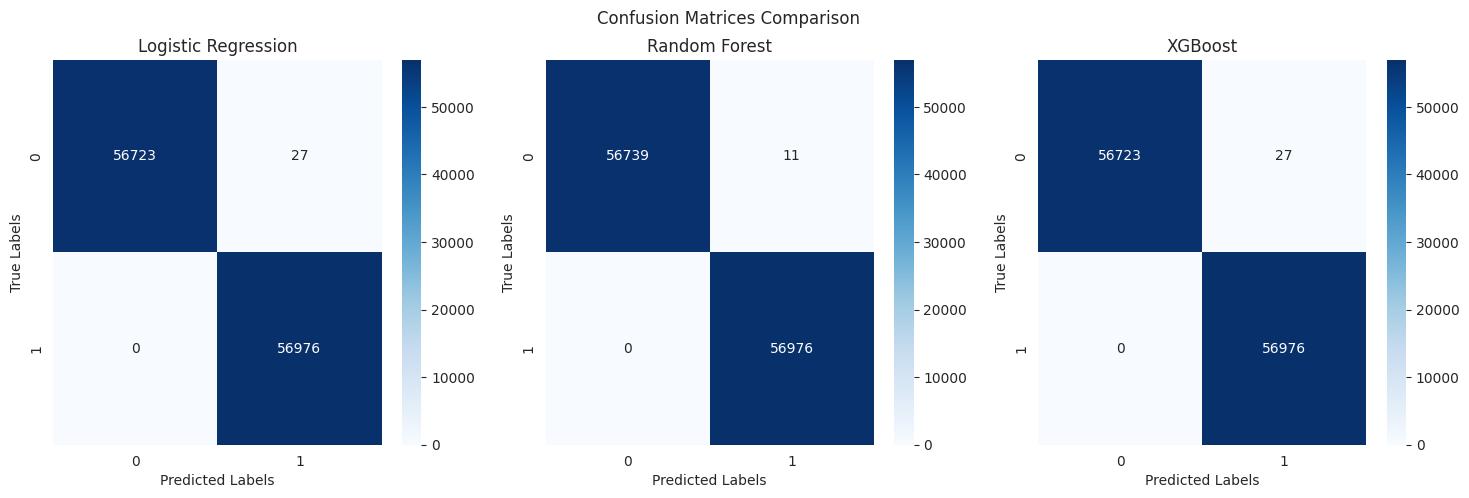

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrices data
conf_matrices = {
    "Logistic Regression": conf_matrix,
    "Random Forest": conf_matrix_rf,
    "XGBoost": conf_matrix_xgb
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices Comparison')

for i, (model, conf_matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(model)
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming X_resampled, y_resampled, logistic_regression_model, random_forest_model, and xgb_classifier_model are defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# --- Logistic Regression Model ---
# Predict on the test set
y_pred_lr = logistic_regression_model.predict(X_test)
y_pred_proba_lr = logistic_regression_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds for ROC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

# Evaluation
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Print the evaluation results for Logistic Regression
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)
print("\nLogistic Regression Classification Report:\n", class_report_lr)
print("Logistic Regression ROC AUC Score:", roc_auc_lr)

# --- Random Forest Model ---
# Make predictions
y_pred_rf = random_forest_model.predict(X_test)
y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds for ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Evaluation
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Print the evaluation results for Random Forest
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", class_report_rf)
print("Random Forest ROC AUC Score:", roc_auc_rf)

# --- XGBoost Model ---
# Make predictions
y_pred_xgb = xgb_classifier_model.predict(X_test)
y_pred_proba_xgb = xgb_classifier_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds for ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)

# Evaluation
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Print the evaluation results for XGBoost
print("\nXGBoost Confusion Matrix:\n", conf_matrix_xgb)
print("\nXGBoost Classification Report:\n", class_report_xgb)
print("XGBoost ROC AUC Score:", roc_auc_xgb)

Logistic Regression Confusion Matrix:
 [[55393  1357]
 [ 4370 52606]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Logistic Regression ROC AUC Score: 0.9896968610015253

Random Forest Confusion Matrix:
 [[56739    11]
 [    0 56976]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Random Forest ROC AUC Score: 0.9999986606927471

XGBoost Confusion Matrix

# AUC/ROC Curve

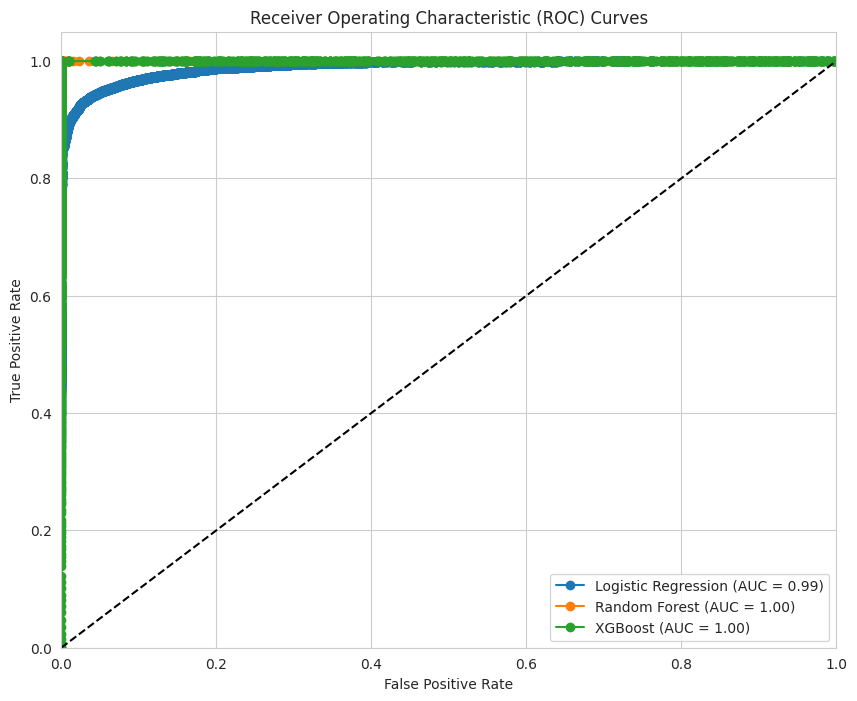

In [ ]:
import matplotlib.pyplot as plt

# Plotting ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:0.2f})', marker='o')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:0.2f})', marker='o')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:0.2f})', marker='o')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()